# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [21]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [23]:
# Visit the website
#https://static.bc-edx.com/data/web/mars_facts/temperature.html

url= 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

#Save the browser html
html=browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [24]:
# Create a Beautiful Soup Object
mars_soup=soup(html,'html.parser')

In [25]:
# Extract all rows of data
table=mars_soup.find('table', class_= 'table') 
print(table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [26]:
# Create an empty list
weather=[]
# Loop through the scraped data to create a list of rows
rows=table.find_all('tr', class_="data-row") #.find_all('tr') #then list ... if rows=table.find('tr', class_="data-row")then object  find_all('tr', class_="data-row") 

#Store the data
for row in rows:
   data_list=[]
   facts=row.find_all('td')
   for fact in facts:
      data_txt=fact.text.strip()
      data_list.append(data_txt)
   weather.append(data_list)

print(weather)

#Create dictionaries for each row
columns=["id", "terrestrial_date", 'sol', "ls", "month", "min_temp", "pressure"]

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [27]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df=pd.DataFrame(weather, columns=columns).set_index('id')

In [28]:
# Confirm DataFrame was created successfully
mars_df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [29]:
# Examine data type of each column
mars_df.dtypes

terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [30]:
# Change data types for data analysis
mars_df["sol"]=pd.to_numeric(mars_df["sol"])
# Use a dictionary to columns
types_dict = {'sol': int,'ls': float,'month':int,'min_temp': float,'pressure': float} 
mars_df = mars_df.astype(types_dict)
#Convert the date
cucu=mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])

In [31]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [32]:
# 1. How many months are there on Mars?
months=mars_df['month'].max() 
print(f'Mars has {months} martian months.')

Mars has 12 martian months.


In [33]:
# 2. How many Martian days' worth of data are there?
martian_days=mars_df['sol'].max()
print(f'The Curiosity has been in Mars {martian_days} martian days, gathering data.')

The Curiosity has been in Mars 1977 martian days, gathering data.


In [34]:
# 3. What is the average low temperature by month?
average_temp_by_month=mars_df.groupby(["month"]).mean()["min_temp"]
avg_temp_df=pd.DataFrame({"Average Temperature":average_temp_by_month})
avg_temp_df

,Average Temperature
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


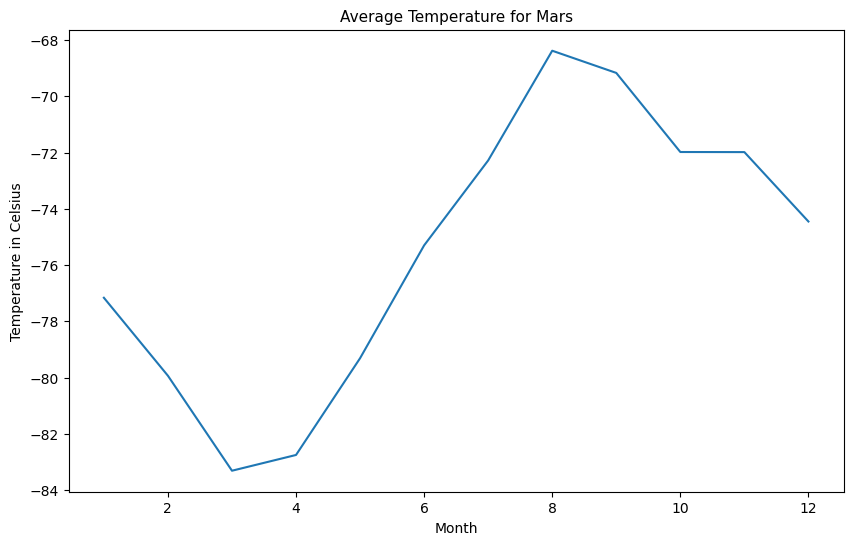

In [35]:
# Plot the average temperature by month
temperatures=avg_temp_df.plot(kind='line',figsize=(10,6), legend=False)
temperatures.set_xlabel("Month", fontsize=10)
temperatures.set_ylabel("Temperature in Celsius",fontsize=10)
temperatures.set_title("Average Temperature for Mars",fontsize=11)
plt.savefig("Output/Mars_temp.png");


In [36]:
# Identify the coldest and hottest months in Curiosity's location
#Calculate the extreme temperatures
coldest_temp=avg_temp_df['Average Temperature'].min()
warmest_temp=avg_temp_df['Average Temperature'].max()

#Search in the index for the month number
coldest=avg_temp_df.index[avg_temp_df['Average Temperature']==coldest_temp].tolist()[0]
warmest=avg_temp_df.index[avg_temp_df['Average Temperature']==warmest_temp].tolist()[0]

#Print the coldest and hottest months in Mars 
print(f"The coldest month is number {coldest} with an average temperature of {round(coldest_temp,2)}")
print(f"The warmest month is number {warmest} with an average temperature of {round(warmest_temp,2)}")

The coldest month is number 3 with an average temperature of -83.31
The warmest month is number 8 with an average temperature of -68.38


In [37]:
# 4. Average pressure by Martian month
average_pressure_by_month=mars_df.groupby(["month"]).mean()["pressure"]

avg_press_df=pd.DataFrame({"Average Pressure":average_pressure_by_month})
avg_press_df

,Average Pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


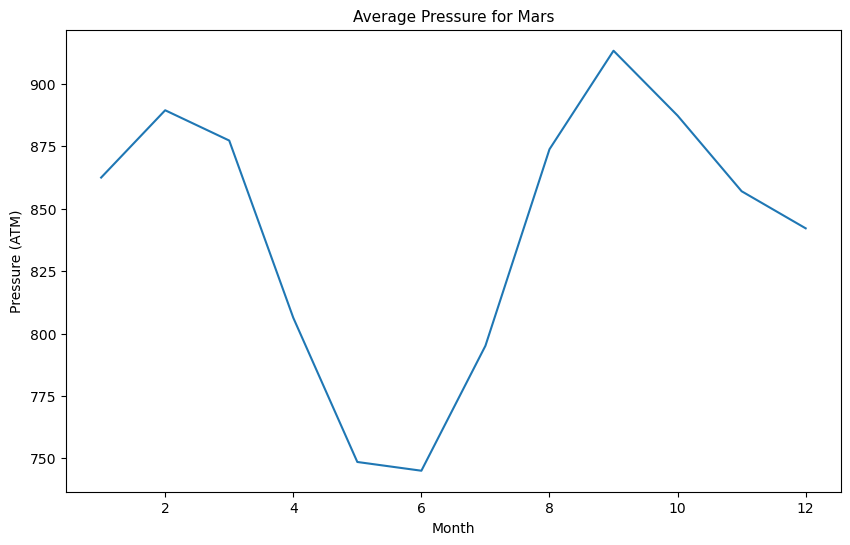

In [38]:
# Plot the average pressure by month
pressure=avg_press_df.plot(kind='line',figsize=(10,6), legend=False)
pressure.set_xlabel("Month", fontsize=10)
pressure.set_ylabel("Pressure (ATM)",fontsize=10)
pressure.set_title("Average Pressure for Mars",fontsize=11)
plt.savefig("Output/Mars_press.png");

In [39]:
# Identify the maximum and minimum pressure 
min_pressure=avg_press_df['Average Pressure'].min()
max_pressure=avg_press_df['Average Pressure'].max()

# Identify the months with the maximum and minimum pressure 
month_min=avg_press_df.index[avg_press_df['Average Pressure']==min_pressure].tolist()[0]
month_max=avg_press_df.index[avg_press_df['Average Pressure']==max_pressure].tolist()[0]

#Print the coldest and hottest months in Mars 
print(f"The month with the minimum pressure is number {month_min} with an average pressure of {round(min_pressure,2)}")
print(f"The month with the maximum pressure is number {month_max} with an average pressure of {round(max_pressure,2)}")

The month with the minimum pressure is number 6 with an average pressure of 745.05
The month with the maximum pressure is number 9 with an average pressure of 913.31


In [40]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Obtain the first and last date of our dataframe
print(mars_df['terrestrial_date'].min(),mars_df['terrestrial_date'].max())

#Calculate the first and lasta terrestrial dates for each Mars year
    #Note:(Mars year begins when it has an agle=0 against the sun and the year finishes with the angle =360)

min_angle=mars_df.loc[mars_df["ls"]==0,(['ls',"terrestrial_date"])]
max_angle=mars_df.loc[mars_df["ls"]==359,['ls',"terrestrial_date"]]


2012-08-16 00:00:00 2018-02-27 00:00:00


In [41]:
#Get the first day for each year when angle towards the sun equals 0 (ie first day of the year)
first_days=min_angle.groupby(min_angle['terrestrial_date'].dt.year)['terrestrial_date'].min()

#Get the first day for each year when angle towards the sun equals 359(ie last year of the year)
last_days=max_angle.groupby(max_angle['terrestrial_date'].dt.year)['terrestrial_date'].max()

#Calculate diferences for each lap around the sun with first days of each year
dif1=first_days[2015]-first_days[2013]
dif2=first_days[2017]-first_days[2015]
#Calculate diferences for each lap around the sun with last days of each year
dif3=last_days[2017]-last_days[2015]
dif4=last_days[2017]-last_days[2015]

print(dif1,dif2, dif3,dif4 )

687 days 00:00:00 687 days 00:00:00 687 days 00:00:00 687 days 00:00:00


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [42]:
# Write the data to a CSV
#Original table from site
mars_df.to_csv("./Output/Mars_table.csv")
#Dataframe with the monthly temperatures 
avg_temp_df.to_csv("./Output/Temperature_table.csv")
#Dataframe with the monthly pressure 
avg_press_df.to_csv("./Output/Pressure_table.csv")

In [43]:
browser.quit()